In [20]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
model("cat_dog.jpg")[0].boxes


image 1/1 /root/wojtek/mro/mro_yolo/cat_dog.jpg: 448x640 2 dogs, 15.8ms
Speed: 4.0ms preprocess, 15.8ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)


ultralytics.engine.results.Boxes object with attributes:

cls: tensor([16., 16.], device='cuda:0')
conf: tensor([0.9178, 0.4117], device='cuda:0')
data: tensor([[2.6168e+02, 9.4853e+01, 4.6024e+02, 3.1144e+02, 9.1777e-01, 1.6000e+01],
        [1.4065e+02, 1.6928e+02, 2.5422e+02, 3.1672e+02, 4.1168e-01, 1.6000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (415, 612)
shape: torch.Size([2, 6])
xywh: tensor([[360.9568, 203.1488, 198.5622, 216.5923],
        [197.4313, 242.9995, 113.5694, 147.4329]], device='cuda:0')
xywhn: tensor([[0.5898, 0.4895, 0.3244, 0.5219],
        [0.3226, 0.5855, 0.1856, 0.3553]], device='cuda:0')
xyxy: tensor([[261.6757,  94.8526, 460.2379, 311.4449],
        [140.6466, 169.2830, 254.2160, 316.7159]], device='cuda:0')
xyxyn: tensor([[0.4276, 0.2286, 0.7520, 0.7505],
        [0.2298, 0.4079, 0.4154, 0.7632]], device='cuda:0')

In [18]:
from ultralytics import YOLO

model = YOLO("yolov8n.pt")
results = model.train(data="OID_mid/oid.yaml", epochs=50, imgsz=640)

New https://pypi.org/project/ultralytics/8.0.216 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.210 🚀 Python-3.10.13 torch-2.0.1 CUDA:0 (NVIDIA GeForce RTX 3090, 24260MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=OID_mid/oid.yaml, epochs=50, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train24, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, 

Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅
train: Scanning /root/wojtek/mro/mro_yolo/OID_mid/labels/train... 3947 images, 0
train: New cache created: /root/wojtek/mro/mro_yolo/OID_mid/labels/train.cache
val: Scanning /root/wojtek/mro/mro_yolo/OID_mid/labels/val... 395 images, 0 back
val: New cache created: /root/wojtek/mro/mro_yolo/OID_mid/labels/val.cache
Plotting labels to runs/detect/train24/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train24
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size
       1/5


image 1/1 /root/wojtek/mro/mro_yolo/cat_dog.jpg: 448x640 2 dogs, 16.1ms
Speed: 3.7ms preprocess, 16.1ms inference, 2.8ms postprocess per image at shape (1, 3, 448, 640)


tensor([360.9568, 203.1488, 198.5622, 216.5923], device='cuda:0')

In [92]:
from PIL import Image, ImageFilter


model = YOLO("best.pt")


def blur_regions_in_image(img_path, conf=0.15):
    img = Image.open(img_path)

    preds = model(img, conf=conf)[0]
    for coords in preds.boxes.xyxy.long():
        x1, y1, x2, y2 = coords.tolist()
        region = img.crop((x1, y1, x2, y2))
        blurred_region = region.filter(ImageFilter.GaussianBlur(radius=15))
        img.paste(blurred_region, (x1, y1, x2, y2))

    return img

In [ ]:
blur_regions_in_image("1.webp")


0: 448x640 10 Foods, 16.7ms
Speed: 4.4ms preprocess, 16.7ms inference, 3.0ms postprocess per image at shape (1, 3, 448, 640)


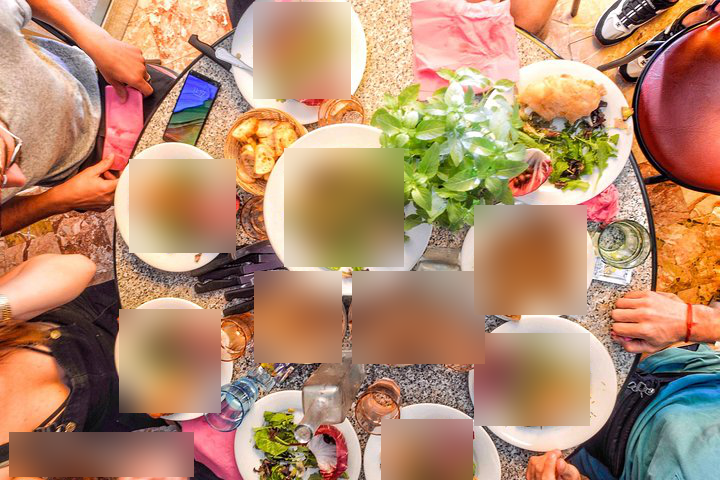

In [106]:
blur_regions_in_image("2.jpeg", conf=0.07)


0: 640x512 1 Food, 18.9ms
Speed: 5.8ms preprocess, 18.9ms inference, 3.2ms postprocess per image at shape (1, 3, 640, 512)


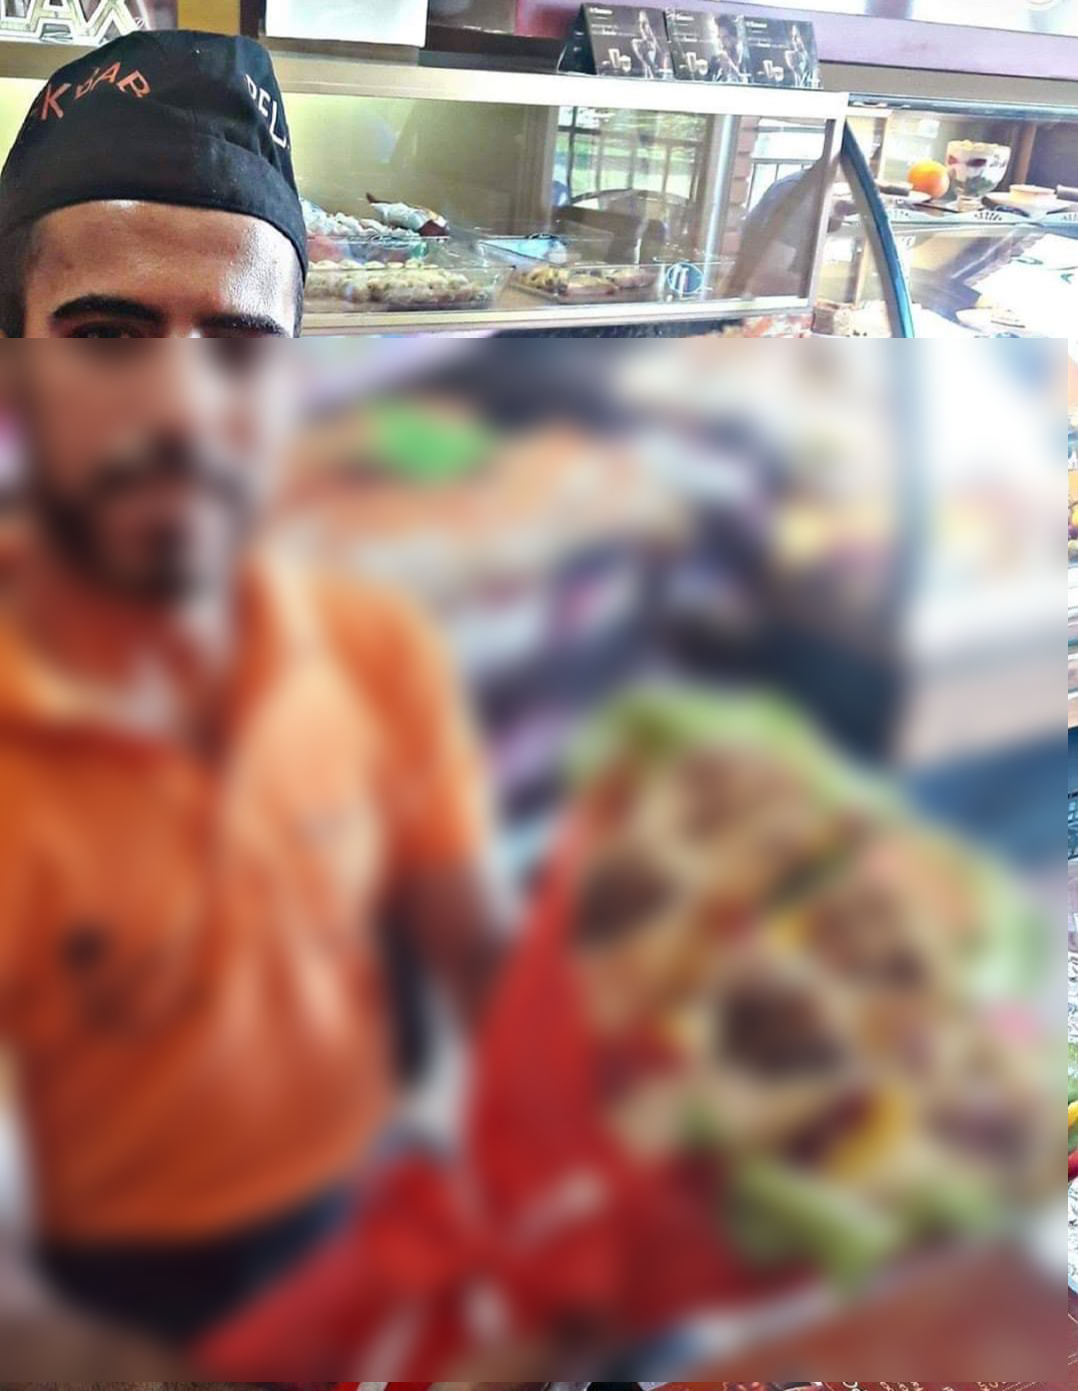

In [109]:
blur_regions_in_image("4.jpeg")


0: 320x640 1 Food, 21.3ms
Speed: 3.8ms preprocess, 21.3ms inference, 3.4ms postprocess per image at shape (1, 3, 320, 640)


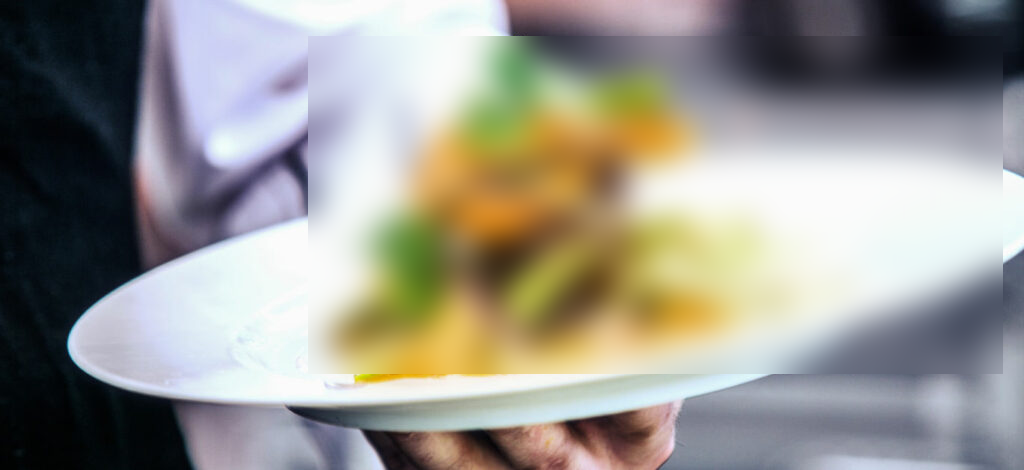

In [110]:
blur_regions_in_image("5.jpeg")


0: 448x640 2 Foods, 24.7ms
Speed: 5.2ms preprocess, 24.7ms inference, 3.4ms postprocess per image at shape (1, 3, 448, 640)


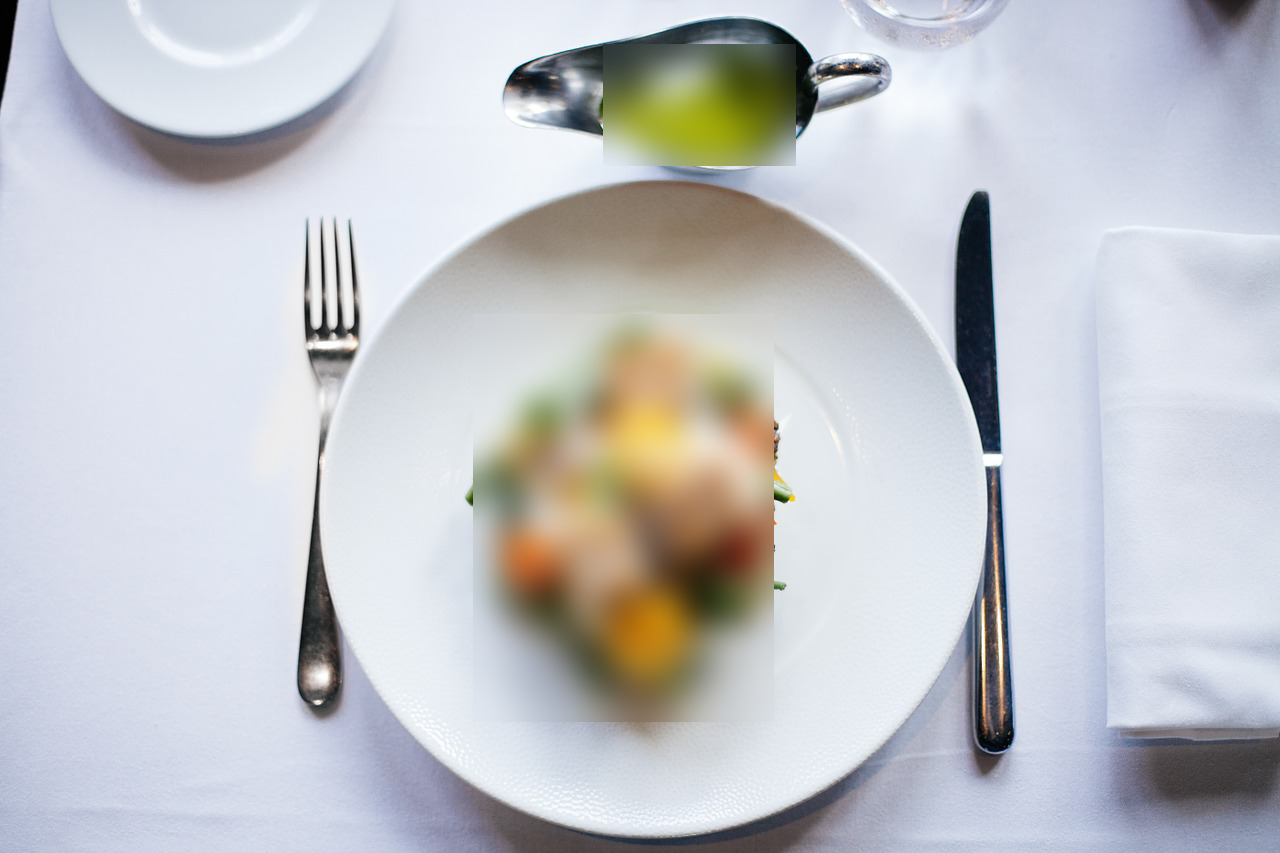

In [111]:
blur_regions_in_image("6.jpeg")


0: 512x640 2 Foods, 18.8ms
Speed: 5.7ms preprocess, 18.8ms inference, 3.3ms postprocess per image at shape (1, 3, 512, 640)


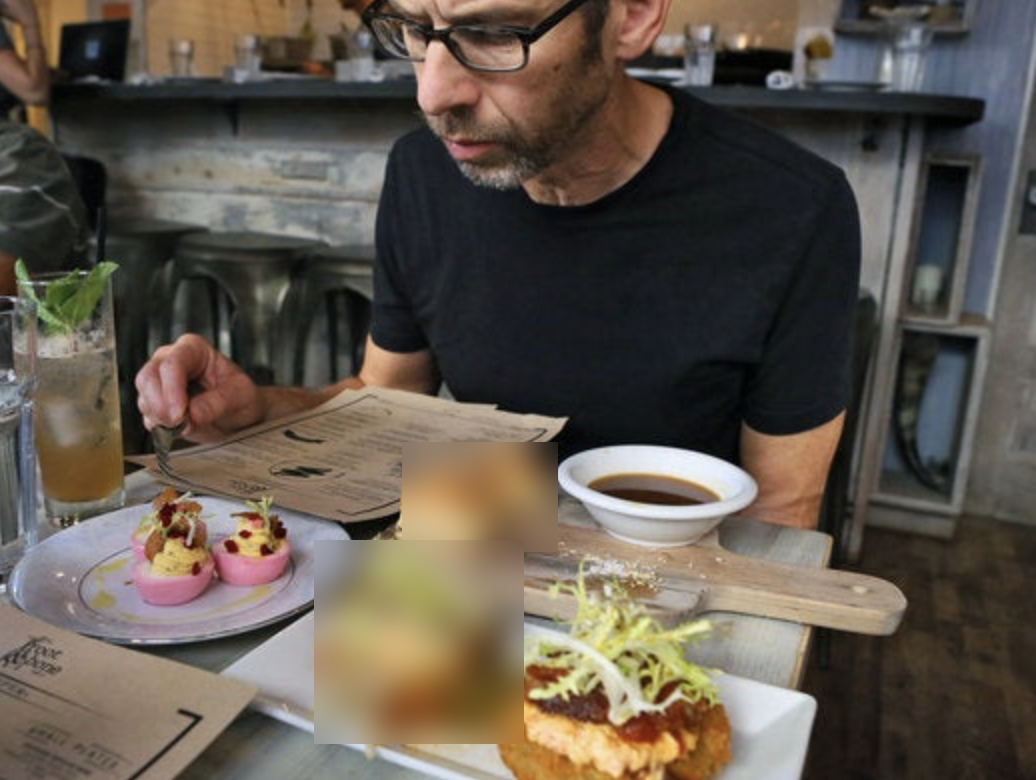

In [117]:
blur_regions_in_image("11.png", conf=0.05)


0: 448x640 4 Foods, 20.9ms
Speed: 5.6ms preprocess, 20.9ms inference, 3.6ms postprocess per image at shape (1, 3, 448, 640)


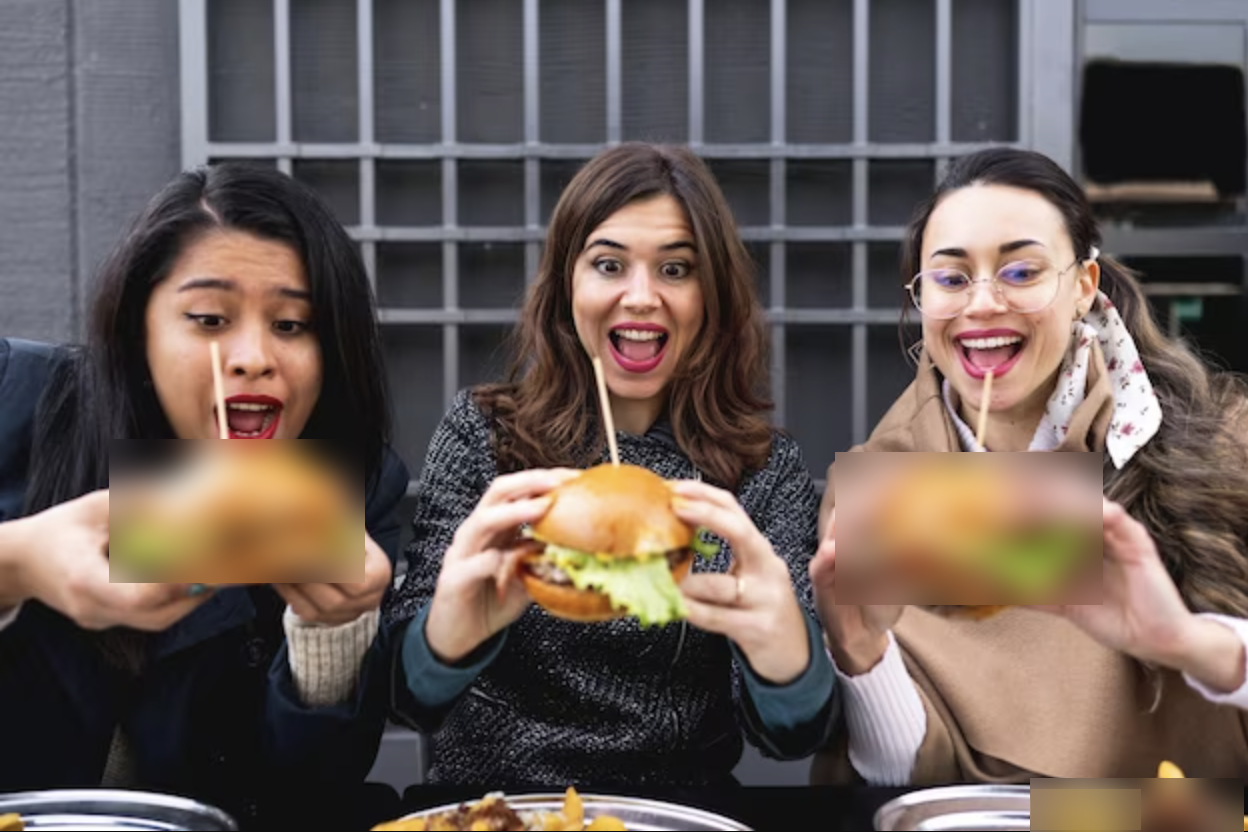

In [121]:
blur_regions_in_image("22.png", conf=0.05)